In [ ]:
##In Google Colab, set up to GPU by going to Runtime -> Change runtime type -> Hardware accelerator -> GPU.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Installing Necessary Libraries and Importing Data**

In [ ]:
!pip install Unidecode

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
!pip install spacy
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
# graphics import
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.text import FreqDistVisualizer
import unidecode
from wordcloud import WordCloud,STOPWORDS
# string operations
import string
import re
# graphics import
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.classifier import DiscriminationThreshold

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Master Project - MCS_AI/Medical-Abstracts-TC-Corpus-main/TrainPreProcessed_Data.csv')
train_df = pd.DataFrame(train_dataset)
test_dataset = pd.read_csv('/content/drive/MyDrive/Master Project - MCS_AI/Medical-Abstracts-TC-Corpus-main/TestPreProcessed_Data.csv')
test_df = pd.DataFrame(test_dataset)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition_label      2888 non-null   object
 1   medical_abstract     2888 non-null   object
 2   medical_abstract_lw  2888 non-null   object
 3   medical_abstract_cl  2888 non-null   object
 4   medical_abstract_lm  2888 non-null   object
 5   medical_abstract_sw  2888 non-null   object
dtypes: object(6)
memory usage: 135.5+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition_label      11550 non-null  object
 1   medical_abstract     11550 non-null  object
 2   medical_abstract_lw  11550 non-null  object
 3   medical_abstract_cl  11550 non-null  object
 4   medical_abstract_lm  11550 non-null  object
 5   medical_abstract_sw  11550 non-null  object
dtypes: object(6)
memory usage: 541.5+ KB


In [ ]:
train_df.head(14)

,condition_label,medical_abstract,medical_abstract_lw,medical_abstract_cl,medical_abstract_lm,medical_abstract_sw
0,General pathological conditions,Tissue changes around loose prostheses. A cani...,tissue changes around loose prostheses. a cani...,tissue changes around loose prostheses canine ...,tissue changes around loose prostheses canine ...,tissue changes around loose prostheses canine ...
1,Neoplasms,Neuropeptide Y and neuron-specific enolase lev...,neuropeptide y and neuron-specific enolase lev...,neuropeptide neuronspecific enolase levels ben...,neuropeptide neuronspecific enolase levels ben...,neuropeptide neuronspecific enolase levels ben...
2,Digestive system diseases,"Sexually transmitted diseases of the colon, re...","sexually transmitted diseases of the colon, re...",sexually transmitted diseases colon rectum anu...,sexually transmitted diseases colon rectum anu...,sexually transmitted diseases colon rectum anu...
3,Neoplasms,Lipolytic factors associated with murine and h...,lipolytic factors associated with murine and h...,lipolytic factors associated murine human canc...,lipolytic factors associated murine human canc...,lipolytic factors associated murine human canc...
4,Nervous system diseases,Does carotid restenosis predict an increased r...,does carotid restenosis predict an increased r...,carotid restenosis predict increased risk late...,carotid restenosis predict increased risk late...,carotid restenosis predict increased risk late...
5,Nervous system diseases,The shoulder in multiple epiphyseal dysplasia....,the shoulder in multiple epiphyseal dysplasia....,shoulder multiple epiphyseal dysplasia one hun...,shoulder multiple epiphyseal dysplasia one hun...,shoulder multiple epiphyseal dysplasia one hun...
6,Digestive system diseases,The management of postoperative chylous ascite...,the management of postoperative chylous ascite...,management postoperative chylous ascites case ...,management postoperative chylous ascites case ...,management postoperative chylous ascites case ...
7,Cardiovascular diseases,Pharmacomechanical thrombolysis and angioplast...,pharmacomechanical thrombolysis and angioplast...,pharmacomechanical thrombolysis angioplasty ma...,pharmacomechanical thrombolysis angioplasty ma...,pharmacomechanical thrombolysis angioplasty ma...
8,General pathological conditions,Color Doppler diagnosis of mechanical prosthet...,color doppler diagnosis of mechanical prosthet...,color doppler diagnosis mechanical prosthetic ...,color doppler diagnosis mechanical prosthetic ...,color doppler diagnosis mechanical prosthetic ...
9,General pathological conditions,Noninvasive diagnosis of right-sided extracard...,noninvasive diagnosis of right-sided extracard...,noninvasive diagnosis rightsided extracardiac ...,noninvasive diagnosis rightsided extracardiac ...,noninvasive diagnosis rightsided extracardiac ...


In [ ]:
train_df['condition_label'].unique()
train_df.condition_label.value_counts()

General pathological conditions    3844
Neoplasms                          2530
Cardiovascular diseases            2441
Nervous system diseases            1540
Digestive system diseases          1195
Name: condition_label, dtype: int64

In [ ]:
train_df=train_df.append(test_df, ignore_index=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14438 entries, 0 to 14437
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition_label      14438 non-null  object
 1   medical_abstract     14438 non-null  object
 2   medical_abstract_lw  14438 non-null  object
 3   medical_abstract_cl  14438 non-null  object
 4   medical_abstract_lm  14438 non-null  object
 5   medical_abstract_sw  14438 non-null  object
dtypes: object(6)
memory usage: 676.9+ KB


<ipython-input-53-f8c4afd6a8c0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df=train_df.append(test_df, ignore_index=True)


In [ ]:
train_df['condition_label'].unique()
train_df.condition_label.value_counts()

General pathological conditions    4805
Neoplasms                          3163
Cardiovascular diseases            3051
Nervous system diseases            1925
Digestive system diseases          1494
Name: condition_label, dtype: int64

================================================================================================

# **LSTM**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

In [ ]:
sentences= train_df['medical_abstract_sw'].tolist()
labels=train_df['condition_label'].tolist()

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,lower=True)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 42901 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14438, 100)


In [ ]:
Y = pd.get_dummies(train_df['condition_label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14438, 5)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11550, 100) (11550, 5)
(2888, 100) (2888, 5)


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
from tensorflow.keras.utils import plot_model
import numpy as np
from keras.layers import LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dropout
import tensorflow as tf

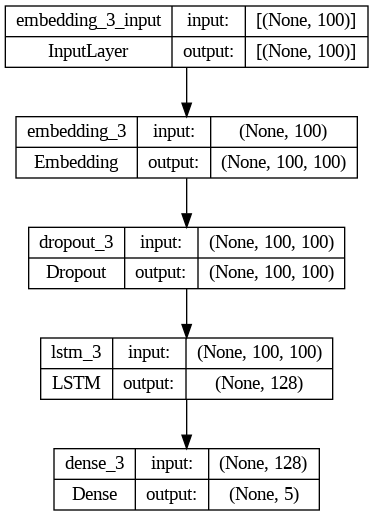

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
plot_model(model, show_shapes = True)

In [ ]:
epochs = 4
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss')])
# , min_delta=0.0001

Epoch 1/4
145/145 [==============================] - 79s 513ms/step - loss: 1.3770 - acc: 0.4184 - f1_m: 0.1712 - precision_m: 0.3671 - recall_m: 0.1161 - val_loss: 1.2491 - val_acc: 0.4745 - val_f1_m: 0.3980 - val_precision_m: 0.6340 - val_recall_m: 0.2934
Epoch 2/4
145/145 [==============================] - 74s 513ms/step - loss: 1.0132 - acc: 0.5913 - f1_m: 0.5130 - precision_m: 0.7089 - recall_m: 0.4071 - val_loss: 1.2289 - val_acc: 0.4978 - val_f1_m: 0.4606 - val_precision_m: 0.5518 - val_recall_m: 0.3963
Epoch 3/4
145/145 [==============================] - 73s 504ms/step - loss: 0.7557 - acc: 0.7149 - f1_m: 0.6954 - precision_m: 0.7515 - recall_m: 0.6482 - val_loss: 1.3223 - val_acc: 0.4831 - val_f1_m: 0.4515 - val_precision_m: 0.5020 - val_recall_m: 0.4110


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test)

91/91 [==============================] - 4s 38ms/step - loss: 1.2764 - acc: 0.4948 - f1_m: 0.4675 - precision_m: 0.5189 - recall_m: 0.4269


In [ ]:
print('Loss: ',loss)
print('Accuracy: ', accuracy)
print('F1 Score: ',f1_score)
print('Precision: ',precision)
print('Recall: ', recall)

Loss:  1.2764339447021484
Accuracy:  0.49480608105659485
F1 Score:  0.4675010144710541
Precision:  0.5189082026481628
Recall:  0.4268544018268585


In [ ]:
len(Y_train)

11550

In [ ]:
accr = model.evaluate(X_train,Y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

361/361 [==============================] - 16s 43ms/step - loss: 0.6961 - acc: 0.7416 - f1_m: 0.7262 - precision_m: 0.7759 - recall_m: 0.6841
Test set
  Loss: 0.696
  Accuracy: 0.742


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

91/91 [==============================] - 5s 59ms/step - loss: 1.2764 - acc: 0.4948 - f1_m: 0.4675 - precision_m: 0.5189 - recall_m: 0.4269
Test set
  Loss: 1.276
  Accuracy: 0.495


In [ ]:
# Make predictions with feature extraction model
model_pred_probs = model.predict(X_test)
model_pred_probs

91/91 [==============================] - 4s 38ms/step


array([[0.7067162 , 0.00433499, 0.26795906, 0.00487111, 0.01611867],
       [0.8658475 , 0.00212585, 0.11047632, 0.00189018, 0.01966002],
       [0.81873417, 0.00229816, 0.15722872, 0.00169462, 0.02004436],
       ...,
       [0.7600683 , 0.00814826, 0.12806056, 0.0044339 , 0.09928896],
       [0.00588913, 0.01410064, 0.1355621 , 0.8278233 , 0.01662475],
       [0.03810145, 0.04546287, 0.89911467, 0.00833147, 0.00898954]],
      dtype=float32)

In [ ]:
# Convert the predictions with feature extraction model to classes
model_preds = tf.argmax(model_pred_probs, axis=1)
model_preds

<tf.Tensor: shape=(2888,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 3, 2])>

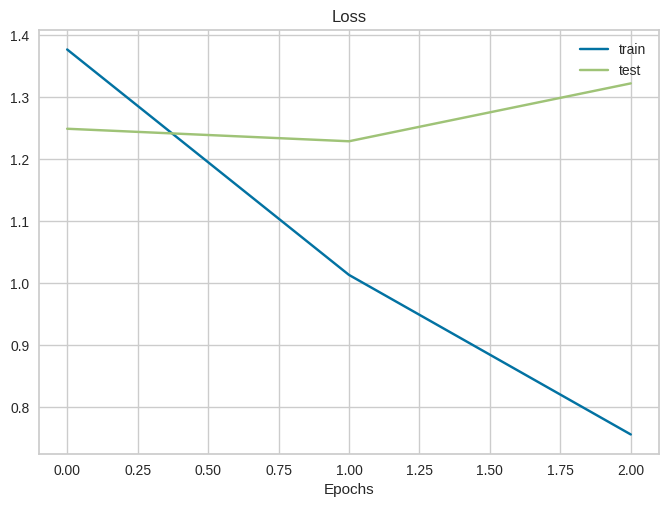

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show();

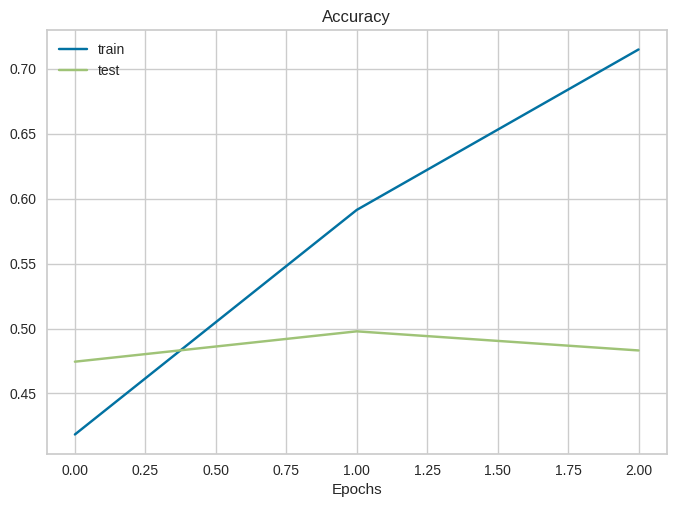

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show();

# **=======================================================================**